# Analyze and Visualize

In [53]:
import pandas as pd
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
import numpy as np

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

In [55]:
# Summary of the data
twitter_archive_master.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,confidence_level
count,2.075000e+03,2075.000000,2075.0,2075.000000,2075.000000,1949.000000
mean,7.367229e+17,10.621205,10.0,2710.581687,8790.267952,0.594207
std,6.729030e+16,2.209416,0.0,4741.963955,12750.772014,0.272281
min,6.660209e+17,0.000000,10.0,12.000000,78.000000,0.044333
25%,6.766970e+17,10.000000,10.0,600.000000,1943.000000,0.362596
50%,7.095662e+17,11.000000,10.0,1316.000000,3996.000000,0.587507
75%,7.881644e+17,12.000000,10.0,3099.500000,10984.000000,0.846986
max,8.924206e+17,27.000000,10.0,83497.000000,164056.000000,1.000000


In [56]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id              2075 non-null int64
timestamp             2075 non-null object
text                  2075 non-null object
rating_numerator      2075 non-null int64
rating_denominator    2075 non-null int64
name                  1383 non-null object
breed                 336 non-null object
retweet_count         2075 non-null int64
favorite_count        2075 non-null int64
image_url             1949 non-null object
prediction            1949 non-null object
confidence_level      1949 non-null float64
dtypes: float64(1), int64(5), object(6)
memory usage: 194.6+ KB


In [57]:
twitter_archive_master.head(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,breed,retweet_count,favorite_count,image_url,prediction,confidence_level
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8304,37995,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6136,32620,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,4061,24551,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,8441,41336,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,9150,39518,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


In [58]:
# generate correlation table
twitter_archive_master.corr()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count,confidence_level
tweet_id,1.000000,0.511789,NaN,0.382843,0.612506,0.104896
rating_numerator,0.511789,1.000000,NaN,0.289842,0.376723,0.100558
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN
retweet_count,0.382843,0.289842,NaN,1.000000,0.926834,0.052219
favorite_count,0.612506,0.376723,NaN,0.926834,1.000000,0.075380
confidence_level,0.104896,0.100558,NaN,0.052219,0.075380,1.000000


##### There is a strong correlation between retweets counts and favourite count

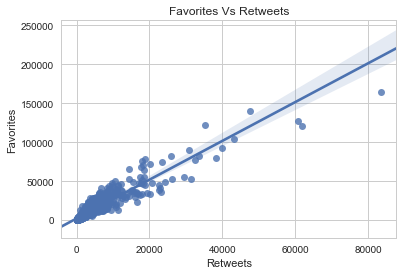

In [73]:
ax = sns.regplot(x=twitter_archive_master.retweet_count, y=twitter_archive_master.favorite_count)
plt.title("Favorites Vs Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.show()

In [60]:
twitter_archive_master.breed.value_counts()

pupper     221
doggo       83
puppo       23
floofer      9
Name: breed, dtype: int64

#### Pupper has the most number of tweets in our data set

In [61]:
# Lets group by breed to get the total number of retweets and favorites by breed
twitter_retweets_by_breed = twitter_archive_master.groupby(['breed'],as_index=False).agg({'retweet_count': np.sum, 'favorite_count': np.sum})
twitter_retweets_by_breed

,breed,retweet_count,favorite_count
0,doggo,528587,1520692
1,floofer,35206,95385
2,pupper,521152,1554092
3,puppo,146770,500156


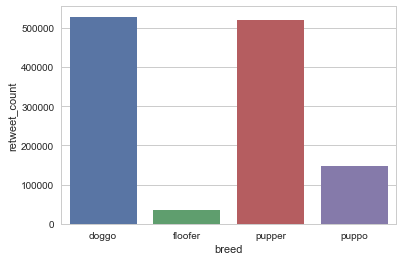

In [62]:
ax = sns.barplot(x="breed", y="retweet_count", data=twitter_retweets_by_breed)

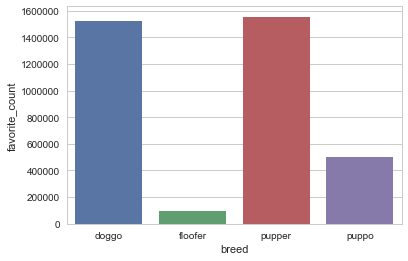

In [63]:
ax = sns.barplot(x="breed", y="favorite_count", data=twitter_retweets_by_breed)

#### Pupper and Doggo are the ones that have the most retweets and favorite counts

In [64]:
# lets calculate another column called ratings using ratings numerator and ratings denominator

twitter_archive_master['ratings'] = twitter_archive_master['rating_numerator']/twitter_archive_master['rating_denominator']

In [65]:
twitter_archive_master[['rating_numerator','rating_denominator','ratings']].head(10)

,rating_numerator,rating_denominator,ratings
0,13,10,1.3
1,13,10,1.3
2,12,10,1.2
3,13,10,1.3
4,12,10,1.2
5,13,10,1.3
6,13,10,1.3
7,13,10,1.3
8,13,10,1.3
9,14,10,1.4


In [66]:
# Now lets calculate the max ratings value by breed
twitter_archive_master.groupby(['breed'],as_index=False).agg({'ratings': np.max})


,breed,ratings
0,doggo,1.4
1,floofer,1.3
2,pupper,2.7
3,puppo,1.4


##### Pupper has the max rating value of 2.7

In [82]:
# Now lets calculate the min ratings value by breed
twitter_archive_master.groupby(['breed'],as_index=False).agg({'ratings': np.min})



,breed,ratings
0,doggo,0.5
1,floofer,1.0
2,pupper,0.3
3,puppo,0.9


#### Pupper also has the min rating of 0.3

In [68]:
# Now lets calculate the mean ratings value by breed
twitter_archive_master.groupby(['breed'],as_index=False).agg({'ratings': np.mean})



,breed,ratings
0,doggo,1.177108
1,floofer,1.188889
2,pupper,1.080543
3,puppo,1.200000


##### Floofer has highest mean rating of  1.18

In [91]:
# Lets look at the data of the dog that received the max rating of 2.7
max_rated_tweet = twitter_archive_master.query('ratings == 2.7')
max_rated_tweet

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,breed,retweet_count,favorite_count,image_url,prediction,confidence_level,ratings
583,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,pupper,1763,6971,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,0.946718,2.7


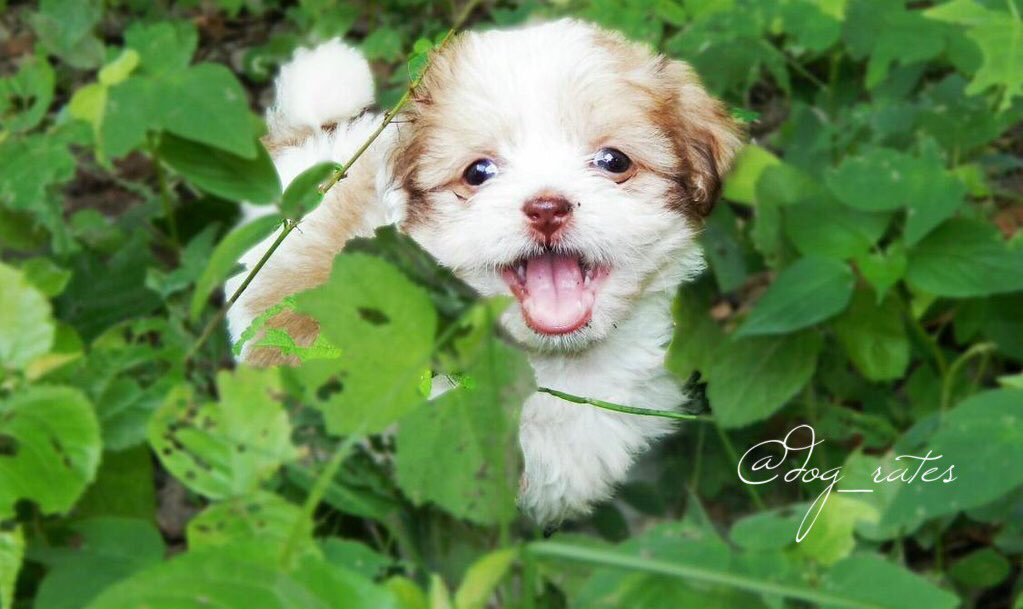

In [105]:
from IPython.display import Image
>>> image = Image('https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg')
>>> image

##### This is the most rated pupper... Awwww